<a href="https://colab.research.google.com/github/purosh96/NeuralNetwork/blob/main/Perceptron_BinaryClass_TF1X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import files
uploaded = files.upload()
uploaded

Saving data.csv to data (6).csv


{'data.csv': b'x1,x2,label\r\n2.6487,4.5192,1\r\n1.5438,2.4443,1\r\n1.899,4.2409,1\r\n2.4711,5.8097,1\r\n3.359,6.4423,1\r\n3.2406,5.8097,1\r\n3.8128,6.3917,1\r\n4.4441,6.8725,1\r\n3.6747,6.7966,1\r\n7.5417,4.0891,0\r\n7.2063,2.3937,0\r\n6.5355,1.331,0\r\n5.4503,1.7358,0\r\n5.8449,2.4443,0\r\n4.8979,3.1781,0\r\n5.8055,4.6711,0\r\n7.3641,5.9868,0\r\n6.2592,4.6711,0\r\n8.3703,7.581,0\r\n8.5676,4.6457,0\r\n8.1676,4.6457,0\r\n'}

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv")
df.head()
#df.label = df.label

,x1,x2,label
0,2.6487,4.5192,1
1,1.5438,2.4443,1
2,1.8990,4.2409,1
3,2.4711,5.8097,1
4,3.3590,6.4423,1


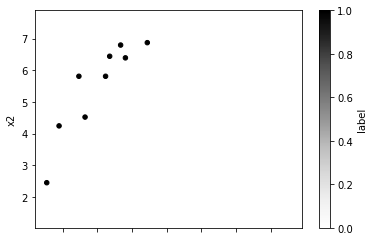

In [5]:
df.plot.scatter("x1","x2",c="label")

In [6]:
df.shape

(21, 3)

In [7]:
Y = df[["label"]]
X = df[["x1","x2"]]

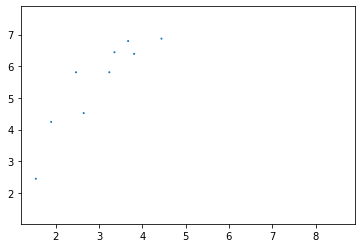

In [8]:
plt.scatter(X.x1,X.x2,Y.label)

In [9]:
import tensorflow as tf

In [10]:
input = tf.placeholder(tf.float32,[None,2])
weight = tf.Variable(tf.zeros([2,1]))
bias = tf.Variable(tf.zeros([1]))
y_true = tf.placeholder(tf.float32,[None,1])

In [11]:
y_pred = tf.matmul(input,weight) + bias
y_pred = tf.sigmoid(y_pred)

In [12]:
individual_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels= y_true,logits=y_pred)
loss = tf.reduce_mean(individual_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
gdo = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = gdo.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [15]:
sess = tf.Session()
sess.run(init)

In [16]:
sess.run(weight)

array([[0.],
       [0.]], dtype=float32)

In [17]:
sess.run(bias)

array([0.], dtype=float32)

In [18]:
for i in range(1000):
  sess.run(train,feed_dict={input:X,y_true:Y})

In [19]:
result = sess.run(y_pred,feed_dict={input:X,y_true:Y})

In [20]:
ypred = result.round()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(Y,ypred))

[[12  0]
 [ 0  9]]


In [23]:
print(accuracy_score(Y,ypred))

1.0
